In [158]:
import pandas as pd
from tabulate import tabulate

data = {
    'temperature': [40,39,38,30,22,18,20,15,9],
    'weather': ['Sunny','Sunny','Sunny','Sunny','Cloudy','Cloudy','Cloudy','Cloudy','Cloudy']
}
df = pd.DataFrame(data)

# print the table
table = tabulate(df, headers='keys', tablefmt='fancy_grid')
print(table)

╒════╤═══════════════╤═══════════╕
│    │   temperature │ weather   │
╞════╪═══════════════╪═══════════╡
│  0 │            40 │ Sunny     │
├────┼───────────────┼───────────┤
│  1 │            39 │ Sunny     │
├────┼───────────────┼───────────┤
│  2 │            38 │ Sunny     │
├────┼───────────────┼───────────┤
│  3 │            30 │ Sunny     │
├────┼───────────────┼───────────┤
│  4 │            22 │ Cloudy    │
├────┼───────────────┼───────────┤
│  5 │            18 │ Cloudy    │
├────┼───────────────┼───────────┤
│  6 │            20 │ Cloudy    │
├────┼───────────────┼───────────┤
│  7 │            15 │ Cloudy    │
├────┼───────────────┼───────────┤
│  8 │             9 │ Cloudy    │
╘════╧═══════════════╧═══════════╛


In [159]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['weather'])

# Print actual values and encoded values
actual_values = df['weather'].unique()
encoded_values = label_encoder.transform(actual_values)
for actual, encoded in zip(actual_values, encoded_values):
    print(f"{actual} == {encoded}")

Sunny == 1
Cloudy == 0


In [160]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

X = df['temperature'].values.reshape(-1,1)
ml_model = LogisticRegression()
ml_model.fit(X, y_encoded)

LogisticRegression()

In [ ]:
# same example with a deep learning model
import tensorflow as tf
from tensorflow.keras import Sequential

dl_model = Sequential([
    tf.keras.layers.Dense(units=1, input_shape=(1,), activation='sigmoid')    
])
dl_model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
dl_model.fit(X, y_encoded, epochs=1500)

In [162]:
# print the neural network shape
dl_model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [163]:
todays_temp = 27

ml_pred = ml_model.predict([[todays_temp]])
ml_pred = label_encoder.inverse_transform([int(ml_pred)])[0]
print(f'Todays temperature is {todays_temp}\u00b0c and the weather is \033[1m{ml_pred}')


dl_pred = dl_model.predict([todays_temp])
# convert the prediction to 0 or 1
prediction = 1 if dl_pred > 0.5 else 0

predicted_weather = label_encoder.inverse_transform([int(prediction)])[0]
print(f'Todays temperature is {todays_temp}\u00b0c and the weather is \033[1m{predicted_weather}')

Todays temperature is 27°c and the weather is Sunny
1/1 [==============================] - 0s 79ms/step
Todays temperature is 27°c and the weather is Sunny


Machine Learning w: [0.6663587], b: [-17.48430808]
Deep Learning w: [[0.08851357]], b: [-2.0334697]


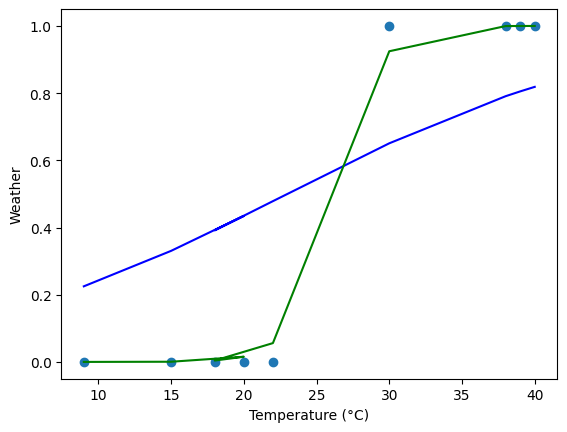

In [164]:
import numpy as np

# visualize the data and the model
plt.scatter(X, y_encoded)
plt.xlabel('Temperature (\u00b0C)')
plt.ylabel('Weather')

# deep learning model
dl_w, dl_b = dl_model.get_weights()
dl_y = 1 / (1 + np.exp(-(dl_w*X + dl_b)))
plt.plot(X, dl_y, 'blue')

# logistic regression model
ml_w = ml_model.coef_[0]
ml_b = ml_model.intercept_
ml_y = 1 / (1 + np.exp(-(ml_w*X + ml_b)))
plt.plot(X, ml_y, 'green')

print (f'Machine Learning w: {ml_w}, b: {ml_b}')
print (f'Deep Learning w: {dl_w}, b: {dl_b}')